# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Classifer model generalization exercises

Tasks: 

1. Test if the problem (given the dataset) is linearly separabile, compare Logistic Regresion and Decision Trees.  

2. Evaluate when the Decision Tree starts overfitting with regard to the tree depth.  

3. Tune DT hyperparameters using cross-validation with grid search technique. Report the best hyperparameters and achieved accuracy. 

In [9]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Overal Accuracy = no_correct_clasification_samples / no_all_samples 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### Sample data

In [3]:
X, y = make_classification(n_samples=10000, n_features=20,
                           n_informative=5, n_redundant=15, random_state=1)

In [5]:
X.shape

(10000, 20)

In [6]:
y.shape

(10000,)

In [7]:
# Classes
np.unique(y)

array([0, 1])

In [10]:
# Split traina nd test (50%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### 1. Is the problem linearly separable? 
Test logistic regression model. 

In [11]:
# instantiate Logistic regression model
lr = LogisticRegression() 

In [12]:
# fit model
lr.fit(X_train, y_train)

LogisticRegression()

In [15]:
# train accuracy
y_train_pred = lr.predict(X_train)
oa_train = accuracy_score(y_train, y_train_pred) 
print(f'Logistic regresion training OA: {round(oa_train * 100, 1)} %') 

Logistic regresion training OA: 85.4 %


In [16]:
# test Overall Accuracy 
y_test_pred = lr.predict(X_test)
oa_test = accuracy_score(y_test, y_test_pred) 
print(f'Logistic regresion testing OA: {round(oa_test * 100, 1)} %') 

Logistic regresion testing OA: 86.5 %


In [ ]:
# Evalaute the model

### Compare it with Decision Tree Classifier

In [17]:
# DT model
dt = DecisionTreeClassifier(random_state=42) 

In [18]:
# fit 
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# train accuracy
# train accuracy
y_train_pred = dt.predict(X_train)
oa_train = accuracy_score(y_train, y_train_pred) 
print(f'Decision Tree training OA: {round(oa_train * 100, 1)} %') 

Decision Tree training OA: 100.0 %


In [20]:
# test Overall Accuracy 
y_test_pred = dt.predict(X_test)
oa_test = accuracy_score(y_test, y_test_pred) 
print(f'Decision Tree testing OA: {round(oa_test * 100, 1)} %') 

Decision Tree testing OA: 91.1 %


### 2. When the DT() model starts overfitting with regard to the depth of the tree? 

In [21]:
# Run set of training procedures and evaluation while changing the dtree depth from 1 to 10 
# Store the training and testing accuracy 

training_accuarcy = []
testing_accuracy = [] 

for depth in range(1, 10+1): 
    print(f'Depth: {depth}')
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth) 
    dt.fit(X_train, y_train) 
    y_train_pred = dt.predict(X_train)
    oa_train = accuracy_score(y_train, y_train_pred) 
    print(f'Training OA: {round(oa_train * 100, 1)} %') 
    y_test_pred = dt.predict(X_test)
    oa_test = accuracy_score(y_test, y_test_pred) 
    print(f'Testing OA: {round(oa_test * 100, 1)} %') 
    training_accuarcy.append(oa_train)
    testing_accuracy.append(oa_test) 


Depth: 1
Training OA: 76.9 %
Testing OA: 76.4 %
Depth: 2
Training OA: 80.4 %
Testing OA: 80.9 %
Depth: 3
Training OA: 88.1 %
Testing OA: 87.9 %
Depth: 4
Training OA: 90.1 %
Testing OA: 89.6 %
Depth: 5
Training OA: 91.2 %
Testing OA: 90.3 %
Depth: 6
Training OA: 93.2 %
Testing OA: 91.5 %
Depth: 7
Training OA: 94.0 %
Testing OA: 91.7 %
Depth: 8
Training OA: 94.9 %
Testing OA: 91.6 %
Depth: 9
Training OA: 95.6 %
Testing OA: 91.8 %
Depth: 10
Training OA: 96.7 %
Testing OA: 91.6 %


In [23]:
len(training_accuarcy)

10

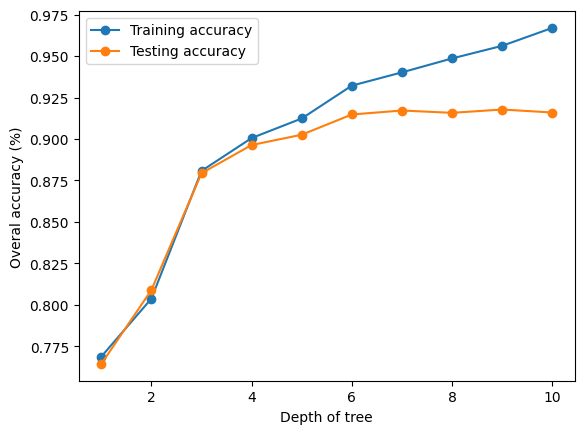

In [30]:
# Plot dependence of the model training and testing accuracy against the depth of the model.
plt.plot(range(1, 10+1), training_accuarcy, 'o-', label='Training accuracy')
plt.plot(range(1, 10+1), testing_accuracy, 'o-', label='Testing accuracy')
plt.xlabel('Depth of tree')
plt.ylabel('Overal accuracy (%)') 
plt.legend()

In [ ]:
# When the model starts overfitting? 

### 3. Finetune the DT model through cross-validation and grid search, report accuracy. 

In [32]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# instantiate the model
model = DecisionTreeClassifier(random_state=42) 

In [33]:
model

DecisionTreeClassifier(random_state=42)

In [35]:
# How many models will be calucated inthe GrisSeach CV process? 
9 * 8 * 5

360

In [36]:
# Apply grid search of hyperparameters and cross-validation 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
hyperparameter_space = {'max_depth': [2,4,6,8,10,15,20,50,100],
                        'min_samples_leaf': [1,2,4,6,8,10,20,30]} 

gs = GridSearchCV(model, param_grid=hyperparameter_space, n_jobs=4,
                  scoring="accuracy", cv=5, return_train_score=True)

In [37]:
# run fit (be aware: takes longer!)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 15, 20, 50, 100],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30]},
             return_train_score=True, scoring='accuracy')

In [39]:
# Optimal parameters and scores 
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated accuracy of the best model: ", round(gs.best_score_ * 100, 1))

Optimal hyperparameter combination:  {'max_depth': 10, 'min_samples_leaf': 4}
Mean cross-validated accuracy of the best model:  91.6


In [41]:
# Test accuracy
model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=4) 
model.fit(X_train, y_train)
# test Overall Accuracy 
y_test_pred = model.predict(X_test)
oa_test = accuracy_score(y_test, y_test_pred) 
print(f'Decision Tree testing OA: {round(oa_test * 100, 1)} %') 

Decision Tree testing OA: 92.0 %


In [ ]:
# Evaluate the result 